<a href="https://colab.research.google.com/github/Squirrel-hub/Machine-Learning-Projects/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NAME**        : KAIZER RAHAMAN
#**ROLL NUMBER** : 19IE10044 

#Regression Machine Learning Case Study Project


Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import arange 
from matplotlib import pyplot 
from pandas import set_option 
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import sklearn.datasets

Loading the Bouston Housing Price dataset

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()
dataset = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
dataset['price'] = house_price_dataset.target

In [ ]:
print(dataset.shape)

(506, 14)


In [ ]:
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object


In [ ]:
print(dataset.head(20))

        CRIM    ZN  INDUS  CHAS   NOX  ...    TAX  PTRATIO       B  LSTAT  price
0   6.32e-03  18.0   2.31   0.0  0.54  ...  296.0     15.3  396.90   4.98   24.0
1   2.73e-02   0.0   7.07   0.0  0.47  ...  242.0     17.8  396.90   9.14   21.6
2   2.73e-02   0.0   7.07   0.0  0.47  ...  242.0     17.8  392.83   4.03   34.7
3   3.24e-02   0.0   2.18   0.0  0.46  ...  222.0     18.7  394.63   2.94   33.4
4   6.91e-02   0.0   2.18   0.0  0.46  ...  222.0     18.7  396.90   5.33   36.2
5   2.99e-02   0.0   2.18   0.0  0.46  ...  222.0     18.7  394.12   5.21   28.7
6   8.83e-02  12.5   7.87   0.0  0.52  ...  311.0     15.2  395.60  12.43   22.9
7   1.45e-01  12.5   7.87   0.0  0.52  ...  311.0     15.2  396.90  19.15   27.1
8   2.11e-01  12.5   7.87   0.0  0.52  ...  311.0     15.2  386.63  29.93   16.5
9   1.70e-01  12.5   7.87   0.0  0.52  ...  311.0     15.2  386.71  17.10   18.9
10  2.25e-01  12.5   7.87   0.0  0.52  ...  311.0     15.2  392.52  20.45   15.0
11  1.17e-01  12.5   7.87   

Printing stastical description of the dataset

In [ ]:
set_option('precision', 1) 
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS  ...  PTRATIO      B  LSTAT  price
count  5.1e+02  506.0  506.0  5.1e+02  ...    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02  ...     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01  ...      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00  ...     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00  ...     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00  ...     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00  ...     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00  ...     22.0  396.9   38.0   50.0

[8 rows x 14 columns]


Printing the correlations between the attributes

In [ ]:
set_option('precision', 2) 
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX  ...   TAX  PTRATIO     B  LSTAT  price
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42  ...  0.58     0.29 -0.39   0.46  -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  ... -0.31    -0.39  0.18  -0.41   0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76  ...  0.72     0.38 -0.36   0.60  -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  ... -0.04    -0.12  0.05  -0.05   0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00  ...  0.67     0.19 -0.38   0.59  -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  ... -0.29    -0.36  0.13  -0.61   0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73  ...  0.51     0.26 -0.27   0.60  -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  ... -0.53    -0.23  0.29  -0.50   0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61  ...  0.91     0.46 -0.44   0.49  -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  0.67  ...  1.00     0.46 -0.44   0.54  -0.47
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19  ...  0.46     1.00 -0.18   0.37  -0.51
B   

Visualizing the dataset using Histogram, Density and Box and Whisker Plots

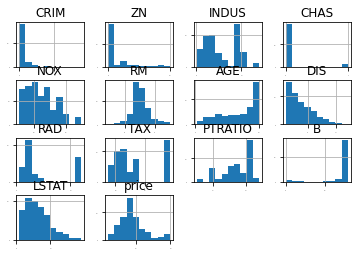

In [ ]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1) 
pyplot.show()

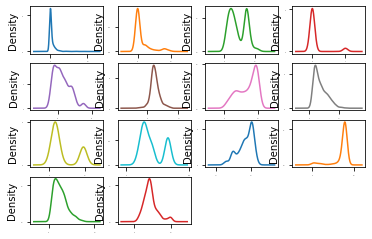

In [ ]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1) 
pyplot.show()

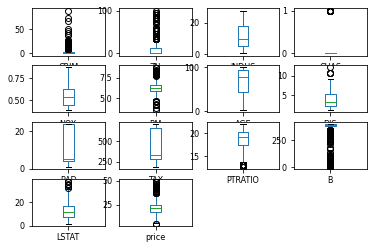

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8) 
pyplot.show()

Visualizing hte dataet using scatter plots

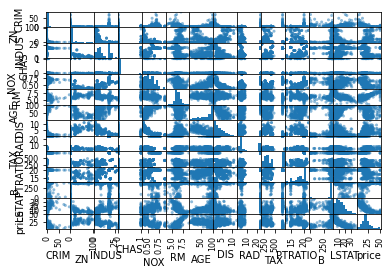

In [ ]:
scatter_matrix(dataset) 
pyplot.show()

Visualize the correlations between attributes

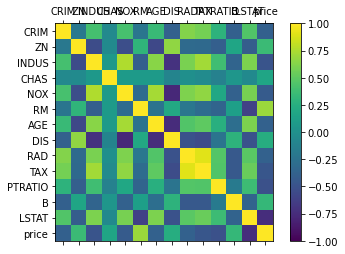

In [ ]:
fig = pyplot.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
ticks = np.arange(0,14,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks)
names =  list(house_price_dataset.feature_names)
names.append('price')
ax.set_xticklabels(names) 
ax.set_yticklabels(names) 
pyplot.show()

Separate Data into a Training and Validation Datasets

In [ ]:
array = dataset.values 
X = array[:,0:13] 
Y = array[:,13] 
validation_size = 0.20 
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Conﬁgure Algorithm Evaluation Test Harness

In [ ]:
num_folds = 10 
seed = 7 
scoring = 'neg_mean_squared_error'

Create the List of Algorithms to Evaluate

In [ ]:
models = [] 
models.append(('LR', LinearRegression())) 
models.append(('LASSO', Lasso())) 
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

Evaluate the List of Algorithms

In [ ]:
results = [] 
names = [] 
for name, model in models: 
  kfold = KFold(n_splits=num_folds, random_state=seed) 
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
  results.append(cv_results) 
  names.append(name) 
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -27.976632 (12.861087)
SVR: -67.827886 (29.049138)


Visualzie the Diﬀerences in Algorithm Performance.

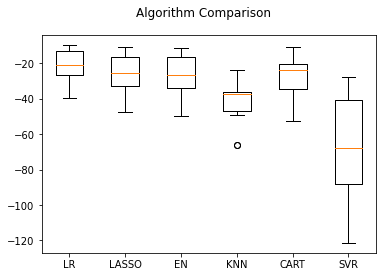

In [ ]:
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

Evaluate Algorithms On Standardized Dataset

In [ ]:
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())]))) 
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())]))) 
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())]))) 
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 
results = [] 
names = [] 
for name, model in pipelines: 
  kfold = KFold(n_splits=num_folds, random_state=seed) 
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
  results.append(cv_results) 
  names.append(name) 
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -23.566235 (8.792137)
ScaledSVR: -29.633086 (17.009186)


Visualzie the Diﬀerences in Algorithm Performance on Standardized Dataset.

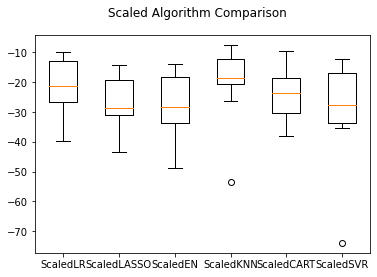

In [ ]:
fig = pyplot.figure() 
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

Tune the Parameters of the KNN Algorithm on the Standardized Dataset

In [ ]:
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21]) 
param_grid = dict(n_neighbors=k_values) 
model = KNeighborsRegressor() 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Print Output From Tuning the KNN Algorithm

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


Evaluate Ensemble Algorithms on the Standardized Dataset.

In [ ]:
ensembles = [] 
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())]))) 
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())]))) 
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())]))) 
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = [] 
names = [] 
for name, model in ensembles: 
  kfold = KFold(n_splits=num_folds, random_state=seed) 
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
  results.append(cv_results) 
  names.append(name) 
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB: -14.861817 (6.841647)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: -10.273090 (4.599373)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRF: -11.826379 (6.083367)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledET: -9.244253 (5.795163)


Visualzie the Diﬀerences in Ensemble Algorithm Performance on Standardized Dataset.

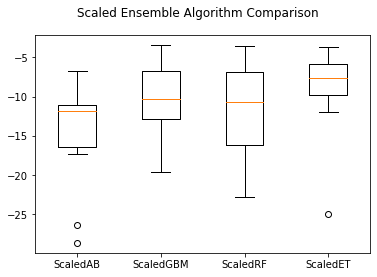

In [ ]:
fig = pyplot.figure() 
fig.suptitle('Scaled Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()

Tune GBM on Scaled Dataset

In [ ]:
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400])) 
model = GradientBoostingRegressor(random_state=seed) 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Print Performance of Tuned GBM on Scaled Dataset

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
for mean, stdev, param in zip(means, stds, params): 
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.379670 using {'n_estimators': 400}
-10.813179 (4.856738) with: {'n_estimators': 50}
-10.057375 (4.566986) with: {'n_estimators': 100}
-9.718097 (4.404730) with: {'n_estimators': 150}
-9.565306 (4.394355) with: {'n_estimators': 200}
-9.477007 (4.376433) with: {'n_estimators': 250}
-9.453795 (4.385228) with: {'n_estimators': 300}
-9.394901 (4.367860) with: {'n_estimators': 350}
-9.379670 (4.382001) with: {'n_estimators': 400}


Construct the Finalized Model.

In [ ]:
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
model = GradientBoostingRegressor(random_state=seed, n_estimators=400) 
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Evaluate the Finalized Model

In [ ]:
rescaledValidationX = scaler.transform(X_validation) 
predictions = model.predict(rescaledValidationX) 
print(mean_squared_error(Y_validation, predictions))

11.902132586880027
